# Exercise 1


In [49]:
import scipy.io as sio

data = sio.loadmat("faces.mat")
X = data["X"]

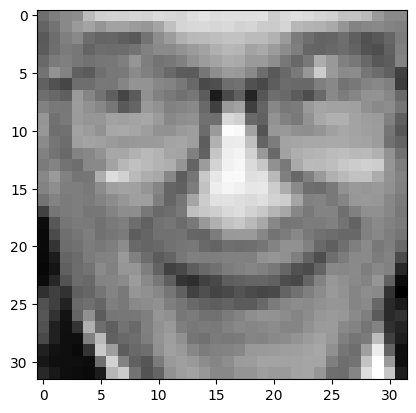

In [50]:
import matplotlib.pyplot as plt
import numpy as np

x0 = np.transpose(np.reshape(X[0, :], (32, 32)))
plt.imshow(x0, cmap="gray")

In [51]:
X.shape

(5000, 1024)

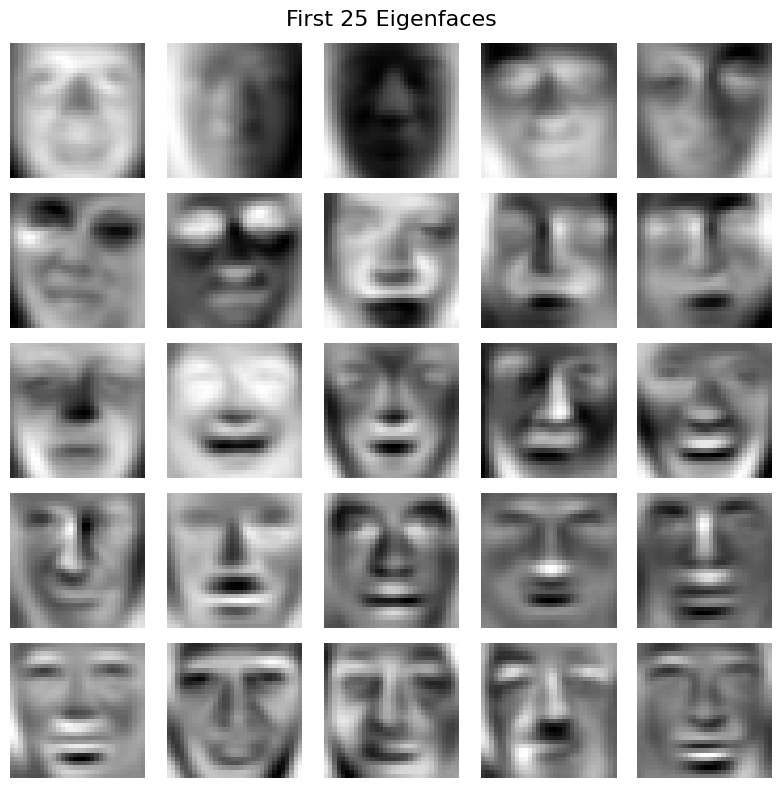

In [52]:
mean_face = np.mean(X, axis=0)  # mean over all faces (shape: (1024,))
tilde_X = X - mean_face  # subtract mean face from every face

# Perform PCA on tilde_X
U, S, Vt = np.linalg.svd(tilde_X, full_matrices=False)

eigenfaces = Vt[:25, :]  # shape: (25, 1024)

# Plot the first 25 eigenfaces
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    # Reshape each principal component to 32x32
    # Transpose to match the original orientation
    face_img = np.reshape(eigenfaces[i, :], (32, 32)).T
    plt.imshow(face_img, cmap="gray")
    plt.axis("off")

plt.suptitle("First 25 Eigenfaces", fontsize=16)
plt.tight_layout()
plt.show()

In [53]:
# Reduce the dimension of the sample from 1024 (32 by 32) to 100 by projecting the matrix tilda_X onto U
k = 100
U_k = U[:, :k]  # shape: (1024, k)
Z = U_k.T @ tilde_X  # shape: (k, m)

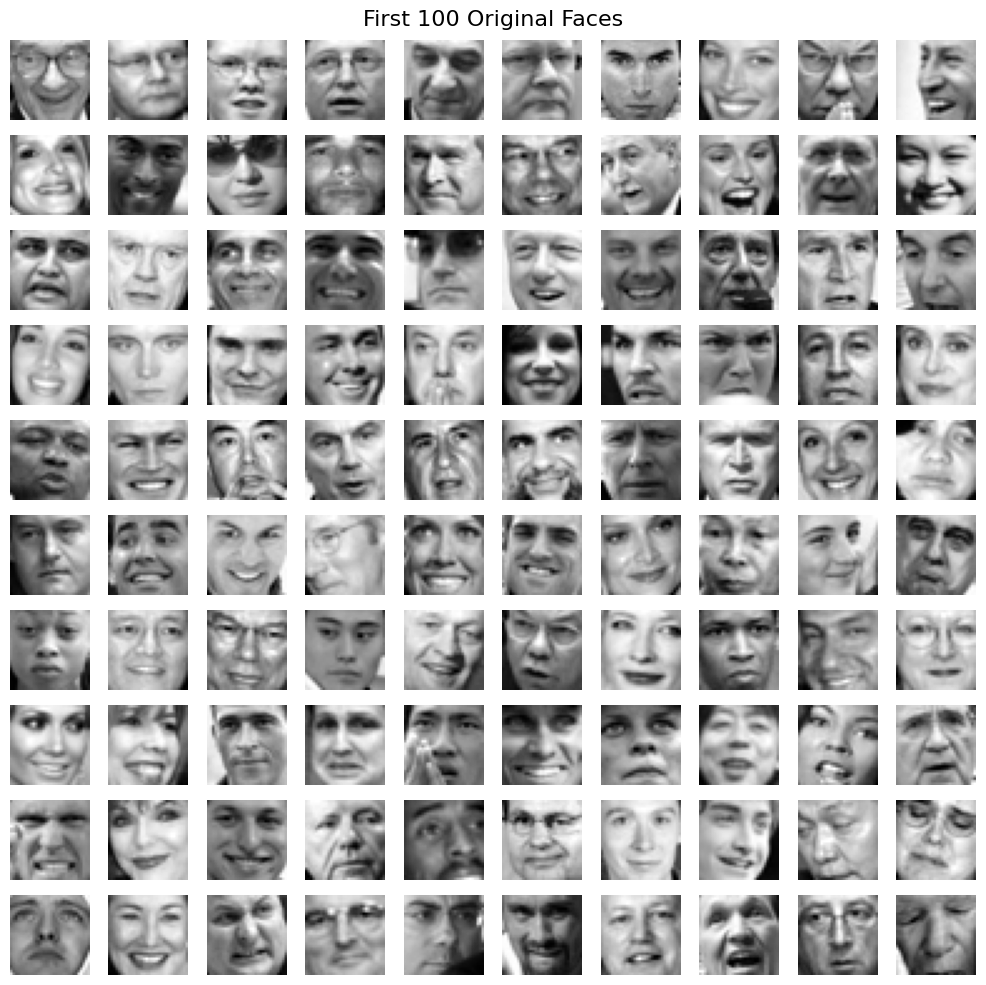

In [54]:
# Plot the original images (pick the first 100 images) and the ones reconstructed from only the first 100 principal components. Plot also the error.
# Plot the first 100 original images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    # Reshape the row (1x1024) into 32x32 and transpose
    face_original = X[i, :].reshape(32, 32).T
    plt.imshow(face_original, cmap="gray")
    plt.axis("off")
plt.suptitle("First 100 Original Faces", fontsize=16)
plt.tight_layout()
plt.show()


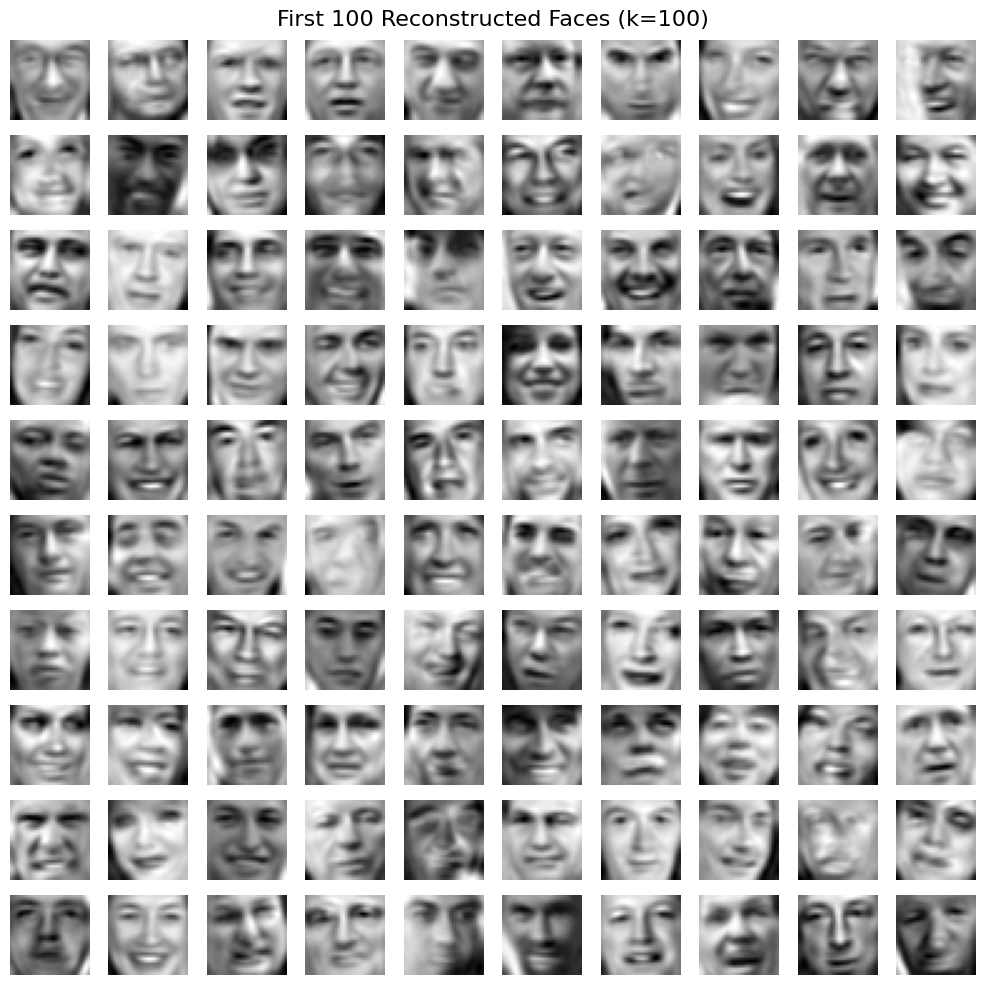

In [55]:
# Reconstruct the first 100 faces using the first 100 principal components
tilde_X_hat = U_k @ Z  # shape: (1024, m)
X_hat = tilde_X_hat + mean_face  # shape: (1024, m)


plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    face_reconstructed = X_hat[i, :].reshape(32, 32).T
    plt.imshow(face_reconstructed, cmap="gray")
    plt.axis("off")
plt.suptitle("First 100 Reconstructed Faces (k=100)", fontsize=16)
plt.tight_layout()
plt.show()

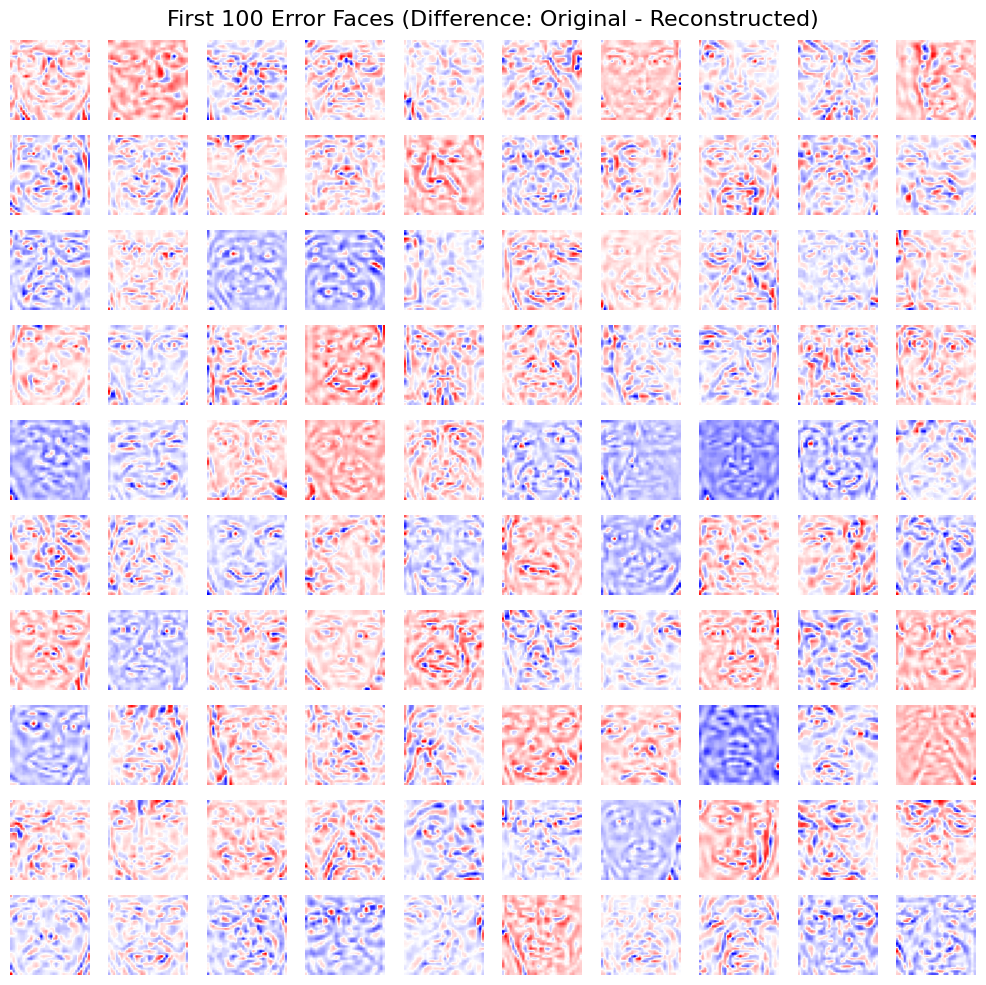

In [56]:
# Plot the error
# The error is the difference between the original and the reconstructed face define
# The deeper the blue color, the greater the error.
error = X - X_hat

plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    face_error = error[i, :].reshape(32, 32).T
    plt.imshow(face_error, cmap="bwr")
    plt.axis("off")
plt.suptitle(
    "First 100 Error Faces (Difference: Original - Reconstructed)", fontsize=16
)
plt.tight_layout()
plt.show()


# Exercise 2


The Rewrite equation see the sheet


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define A, d, c for the quadratic function J(w, b)
A = np.array([[10, 2], [2, 4]])
d = np.array([-2, -1])
c = 0.25


# Define the cost function J(w, b)
def J(w, b):
    """
    J(w, b) = 0.5 * [w b] A [w b]^T + d^T [w b]^T + c
    """
    wb = np.array([w, b])
    return 0.5 * wb @ (A @ wb) + d @ wb + c


# compute the value of the exact parameter vector w and b that minimizes J(w, b)
wb_opt = -np.linalg.inv(A) @ d
w_opt, b_opt = wb_opt
w_opt, b_opt

# use scipy.optimize.minimize to find the optimal w and b
res = minimize(lambda wb: J(wb[0], wb[1]), x0=[0, 0])
w_opt_scipy, b_opt_scipy = res.x
w_opt_scipy, b_opt_scipy

(np.float64(0.16666666325605978), np.float64(0.16666666490950494))

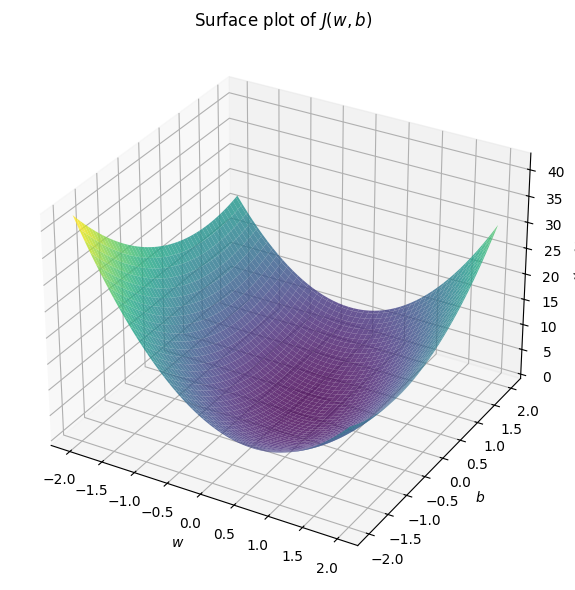

In [58]:
# Create a grid of (w, b) values
w_min, w_max = -2.0, 2.0
b_min, b_max = -2.0, 2.0

num_pts = 100
w_vals = np.linspace(w_min, w_max, num_pts)
b_vals = np.linspace(b_min, b_max, num_pts)

W, B = np.meshgrid(w_vals, b_vals)

# Evaluate J on the grid
Z = np.zeros_like(W)
for i in range(num_pts):
    for j in range(num_pts):
        Z[i, j] = J(W[i, j], B[i, j])

# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection="3d")

ax.plot_surface(W, B, Z, cmap="viridis", alpha=0.8)
ax.set_xlabel("$w$")
ax.set_ylabel("$b$")
ax.set_zlabel("$J(w,b)$")
ax.set_title("Surface plot of $J(w, b)$")

plt.tight_layout()
plt.show()

In [59]:
import numpy as np

A = np.array([[10, 2], [2, 4]])
d = np.array([-2, -1])
c = 0.25

# Gradient-descent parameters
eta = 0.05  # learning rate
w_init = np.array([1, 1])  # initial guess
max_iters = 1000  # maximum number of iterations
tol = 1e-12  # stopping tolerance on the size of an update


# Implement gradient descent
def gradient_descent(A, d, w0, eta, max_iters, tol):
    w = w0.astype(float)  # make sure it's a float array
    for i in range(max_iters):
        grad = A @ w + d  # gradient of J at current w
        w_next = w - eta * grad  # gradient descent update
        if np.linalg.norm(w_next - w) < tol:
            break
        w = w_next
    return w


# Run gradient descent
w_star = gradient_descent(A, d, w_init, eta, max_iters, tol)

print("After gradient descent:")
print(f"  w* = {w_star[0]:.6f}")
print(f"  b* = {w_star[1]:.6f}")

w_exact = np.array([1 / 6, 1 / 6])
error = np.linalg.norm(w_star - w_exact)
print(f"Distance from exact solution: {error:e}")

After gradient descent:
  w* = 0.166667
  b* = 0.166667
Distance from exact solution: 5.747955e-12


In [60]:
# The maximum of learning rate we can use
eta_max = 2 / np.max(np.linalg.eigvals(A))
eta_max

np.float64(0.18858048469644506)

In [61]:
# Set the learning rate to the maximum value, it will not converge
eta = eta_max
# Run gradient descent
w_star = gradient_descent(A, d, w_init, eta, max_iters, tol)

print("After gradient descent:")
print(f"  w* = {w_star[0]:.6f}")
print(f"  b* = {w_star[1]:.6f}")

w_exact = np.array([1 / 6, 1 / 6])
error = np.linalg.norm(w_star - w_exact)
print(f"Distance from exact solution: {error:e}")

After gradient descent:
  w* = 1.161146
  b* = 0.467771
Distance from exact solution: 1.039063e+00


# Exercise 3


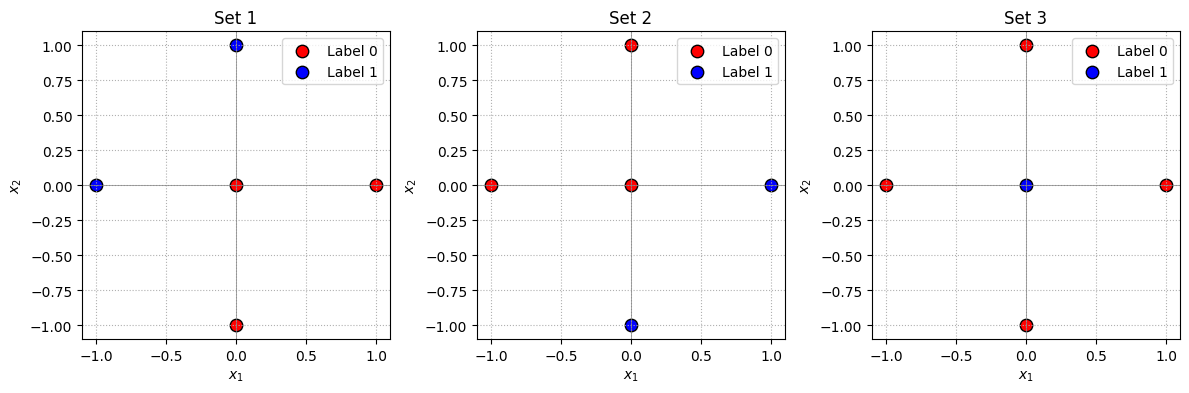

In [62]:
# Plot in 3 pictures the data contained in the 3 datasets.
import numpy as np
import matplotlib.pyplot as plt


set1 = np.array([[0, 0, 0], [1, 0, 0], [0, -1, 0], [-1, 0, 1], [0, 1, 1]])
set2 = np.array([[0, 0, 0], [0, 1, 0], [-1, 0, 0], [1, 0, 1], [0, -1, 1]])
set3 = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0], [-1, 0, 0], [0, -1, 0]])


def plot_dataset(ax, data, title):
    data0 = data[data[:, 2] == 0]
    data1 = data[data[:, 2] == 1]

    ax.scatter(data0[:, 0], data0[:, 1], c="red", label="Label 0", s=80, edgecolors="k")
    ax.scatter(
        data1[:, 0], data1[:, 1], c="blue", label="Label 1", s=80, edgecolors="k"
    )

    ax.axhline(0, color="gray", linewidth=0.5)
    ax.axvline(0, color="gray", linewidth=0.5)

    ax.set_title(title)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_aspect("equal", "box")
    ax.grid(True, linestyle=":")
    ax.legend()


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_dataset(axes[0], set1, "Set 1")
plot_dataset(axes[1], set2, "Set 2")
plot_dataset(axes[2], set3, "Set 3")

plt.tight_layout()
plt.show()

- Set 1 is linearly separable
- Set 2 is also linearly separable, and symmetrically distributed with set1
- Set 3 is not linearly separable


For **set 1**

```
label=0: (0,0), (1,0), (0,-1)
label=1: (-1,0), (0,1)
```

We want $\sigma(\beta^T x) > 0.5$ for label 1 and $\sigma(\beta^T x) < 0.5$ for label 0. Because the sigmoid function is monotonically increasing and $\sigma(0) < 0.5$, we can equivalently say that we want $\beta^T x > 0$ for label 1 and $\beta^T x < 0$ for label 0.

A suitable linear separator can be: $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = -0.1 - x_1 + x_2$, $\beta = [-0.1, -1, 1]^T$

- If $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = -0.1 - x_1 + x_2 > 0$ then the point is classified as label 1
- If $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = -0.1 - x_1 + x_2 < 0$ then the point is classified as label 0

The solution is not unique. For example, we can just scale all coefficients by any positive constant and get the same classification boundary. For instance, $\beta = -0.5, -5, 5$ or $\beta = -1, -10, 10$ would all work.


For **set 2**


```
label=0: (0,0), (0,1), (-1,0)
label=1: (1,0), (0,-1)
```

A suitable separator here is $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = -0.1 + x_1 - x_2$
That corresponds to the parameter vector $\beta = [-0.1, 1, -1]^T$

It can also:

- If $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = -0.1 - x_1 + x_2 > 0$ then the point is classified as label 1
- If $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = -0.1 - x_1 + x_2 < 0$ then the point is classified as label 0

And the solution is not unique as well. The reason is the same as above.


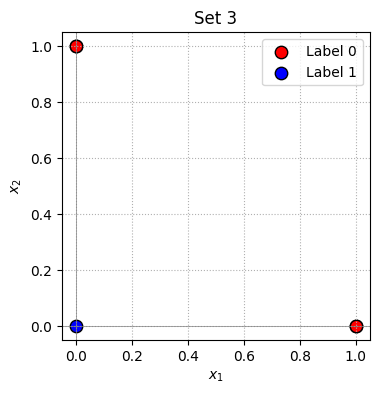

In [63]:
# Consider the following alternative system of coordinate (ξ1, ξ2) to define the data contained in set 3
set3 = np.array([[0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]])
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plot_dataset(axes, set3, "Set 3")

In the $(\xi_1, \xi_2)$-plane, you can separate:

- the single point $(0, 0)$ (label 1),
- from all other points (label 0),

using a linear decision boundary. Concretely, any linear function that is positive only at $(\xi_1 = 0, \xi_2 = 0)$ **and negative for all $(\xi_1, \xi_2)$ containing a 1 will classify the data correctly. One simple example is**

$$
\beta_0 + \beta_1 \xi_1 + \beta_2 \xi_2 = 1 - 2 \xi_1 - 2 \xi_2.
$$

- For the center point $(\xi_1 = 0, \xi_2 = 0)$,

  $$
  1 - 2 \times 0 - 2 \times 0 = 1 > 0 \implies \text{label = 1}.
  $$

- For any other point (where at least one of $\xi_1$ or $\xi_2$ is 1),
  $$
  1 - 2 \times 1 \leq -1 < 0 \implies \text{label = 0}.
  $$

Thus, in the new $(\xi_1, \xi_2)$-space the data do become linearly separable.


## Propose a neural network to determine the parameters to be used to classify set 3.

1. **Architecture**

   - **Input Layer**: 2 neurons $(x_1, x_2)$.

   - **Hidden Layer**: a small number of neurons with a nonlinear activation (like ReLU). This hidden layer can learn to detect that $(0, 0)$ is fundamentally different from the nonzero points.

   - **Output Layer**: 1 neuron with a sigmoid activation ($\sigma$). It outputs a probability $\hat{y} \in [0, 1]$.

2. **Forward Pass**

   - Compute hidden activations via $Z_1 = X W_1 + b_1$, then apply the activation function (e.g., ReLU).

   - Compute the final output $Z_2 = \text{ReLU}(Z_1) W_2 + b_2$. Then $\hat{y} = \sigma(Z_2)$.

3. **Training**

   - Use binary cross-entropy as the loss:

     $$
     L = -\frac{1}{n} \sum_{i=1}^n \left[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right].
     $$

   - Perform gradient descent to adjust $(W_1, b_1, W_2, b_2)$ until $\hat{y} \approx 1$ at the origin and $\hat{y} \approx 0$ elsewhere.
